### Database Setup

In [554]:
# Import relevant packages
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to database file
db_file = 'total_output.db'


In [555]:
# Get names of tables in database
conn = sqlite3.connect(db_file)
query = "SELECT name FROM sqlite_master WHERE type='table';"
table_names_df = pd.read_sql_query(query, conn)
print(table_names_df)
# only one table - all_noisy_table

              name
0  all_noisy_table


In [556]:

# SQL query to select all data from the table
query = 'SELECT * FROM all_noisy_table'

# Load data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()
# Remove unnecessary columns
print(df.columns.to_list())
df = df.drop(['JoinDate', 'index'],axis=1)
df['City'] = df['City'].str.replace('City_', '')
df['Age'] = df['Age'].astype(int)
print(df)

['index', 'ID', 'Name', 'Age', 'City', 'Salary', 'JoinDate']
        ID       Name  Age City     Salary
0        1     Name_1   20    0  104509.45
1        2     Name_2   21    1   53401.42
2        3     Name_3   22    2  118291.15
3        4     Name_0   23    3   60119.26
4        5     Name_5   24    4  111892.54
...    ...        ...  ...  ...        ...
2995  2996  Name_2996   65   95   96917.54
2996  2997  Name_2997   66   96   76070.36
2997  2998  Name_2998   67   97   49177.59
2998  2999  Name_2999   68   98  109764.15
2999  3000  Name_3000   69   99   71546.84

[3000 rows x 5 columns]


# Plotting and Statistical Analysis

### Printing Mean salary and Mean Age


In [557]:

df_salary_mean = df['Salary']
salary_mean = df_salary_mean.mean()
print(salary_mean)

df_age_mean = df['Age']
age_mean = df_age_mean.mean()
print(age_mean)


74032.20057692309
44.49166666666667


### Plotting 5 most documented and 5 least documented cities

In [558]:
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'City Count']
top_5_city_counts = city_counts.head(5)
bottom_5_city_counts = city_counts.tail(5)

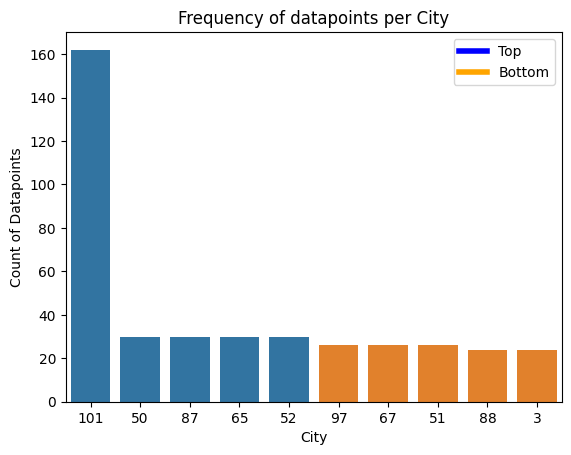

In [559]:
# Bar graph
plt.title('Frequency of datapoints per City')
plt.xlabel('City')
plt.ylabel('Count of Datapoints')
sns.barplot(top_5_city_counts, x='City', y = 'City Count')
sns.barplot(bottom_5_city_counts, x='City', y = 'City Count')

# Displaying legend
orange_patch = plt.Line2D([0], [0], color='blue', linewidth=4, label='Top')
blue_patch = plt.Line2D([0], [0], color='orange', linewidth=4, label='Bottom')
plt.legend(handles=[orange_patch, blue_patch], loc='upper right')

### Getting average counts of data by city, with and without City_101 (only outlier)

In [560]:
# Average count of each city with City_101 = 29.70
# Average count of each city WITHOUT City_101 = 28.38]
city_count_mean = city_counts['City Count'].mean()
print(city_count_mean)

city_counts_drop_101 = city_counts.drop(0)

city_count_mean_drop_101 = city_counts_drop_101['City Count'].mean()
print(city_count_mean_drop_101)

29.702970297029704
28.38


# Analyzing Salary by city and Salary frequency:

### Salary by city

   City        Salary
36   40  84195.493019
42   46  82792.355962
59   61  82301.477246
80   80  81943.612724
13    2  80565.461449


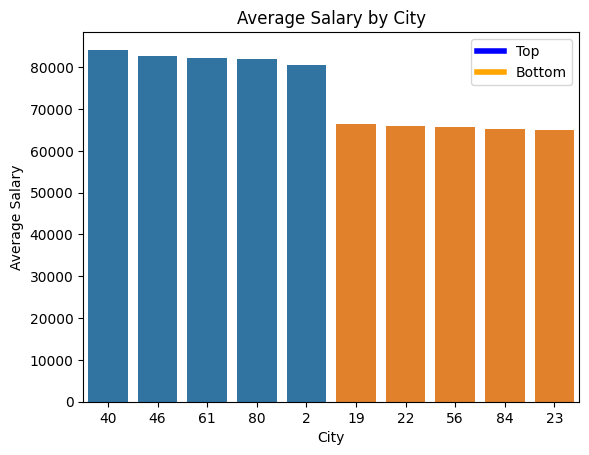

In [561]:
df_salary_by_city = df

average_salary_by_city = df.groupby('City')['Salary'].mean().reset_index()
average_salary_by_city = average_salary_by_city.sort_values(by='Salary',ascending=False)
top_5_average_salary_by_city = average_salary_by_city.head(5)
bottom_5_average_salary_by_city = average_salary_by_city.tail(5)


print(top_5_average_salary_by_city)
# Displaying head and tail data side by side
plt.title('Average Salary by City')
plt.xlabel('City')
plt.ylabel('Average Salary')
sns.barplot(top_5_average_salary_by_city, x='City', y = 'Salary')
sns.barplot(bottom_5_average_salary_by_city, x='City', y = 'Salary')

# Displaying legend
orange_patch = plt.Line2D([0], [0], color='blue', linewidth=4, label='Top')
blue_patch = plt.Line2D([0], [0], color='orange', linewidth=4, label='Bottom')
plt.legend(handles=[orange_patch, blue_patch], loc='upper right')

### Showing distribution of salaries with histogram

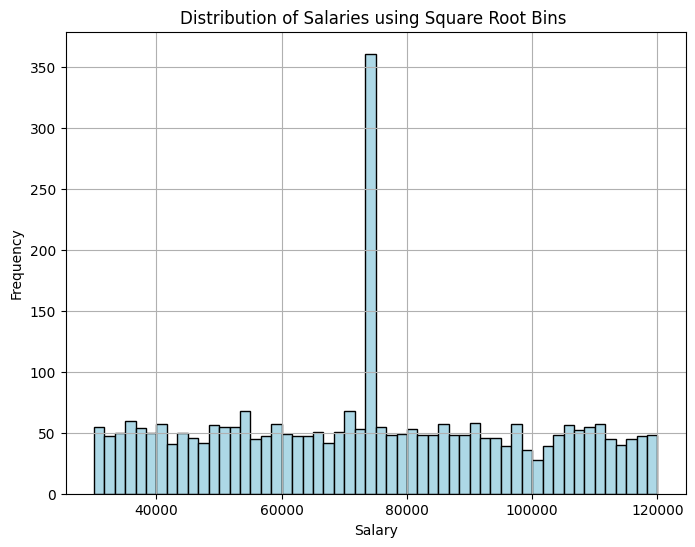

In [562]:
# Deciding how many bins for salaries histogram using square root 
salaries = df['Salary']
datapoints = salaries.shape[0]
n_bins = int(np.sqrt(datapoints))

plt.figure(figsize=(8, 6))
plt.hist(salaries, bins=n_bins, color='lightblue', edgecolor='black')
plt.title('Distribution of Salaries using Square Root Bins ')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Analyzing Age by City and Age frequency

### Freque

In [563]:
age_counts = df['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Age Count']
top_5_age_counts = age_counts.head(5)

bottom_5_age_counts = age_counts.tail(5)

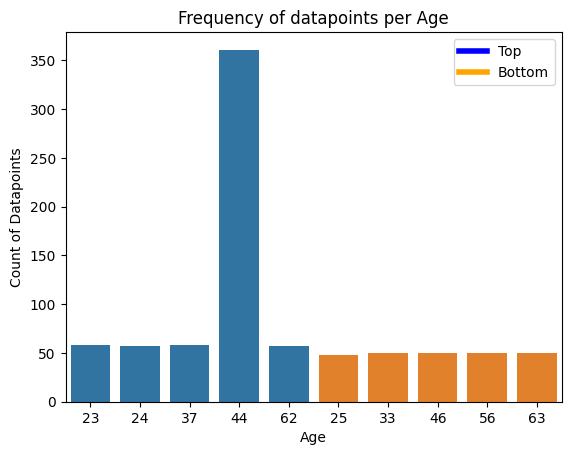

In [564]:
# Bar graph
plt.title('Frequency of datapoints per Age')
plt.xlabel('Age')
plt.ylabel('Count of Datapoints')
sns.barplot(top_5_age_counts, x='Age', y = 'Age Count')
sns.barplot(bottom_5_age_counts, x='Age', y = 'Age Count')

# Displaying legend
orange_patch = plt.Line2D([0], [0], color='blue', linewidth=4, label='Top')
blue_patch = plt.Line2D([0], [0], color='orange', linewidth=4, label='Bottom')
plt.legend(handles=[orange_patch, blue_patch], loc='upper right')

### Age by city

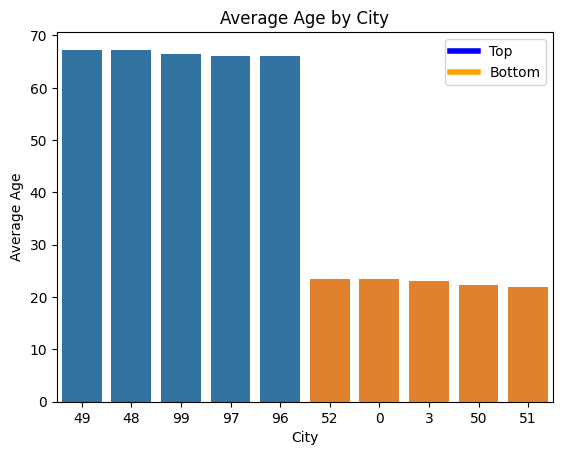

In [565]:
df_age_by_city = df

average_age_by_city = df.groupby('City')['Age'].mean().reset_index()
average_age_by_city = average_age_by_city.sort_values(by='Age',ascending=False)
top_5_average_age_by_city = average_age_by_city.head(5)
bottom_5_average_age_by_city = average_age_by_city.tail(5)


# Displaying head and tail data side by side
plt.title('Average Age by City')
plt.xlabel('City')
plt.ylabel('Average Age')
sns.barplot(top_5_average_age_by_city, x='City', y = 'Age')
sns.barplot(bottom_5_average_age_by_city, x='City', y = 'Age')

# Displaying legend
orange_patch = plt.Line2D([0], [0], color='blue', linewidth=4, label='Top')
blue_patch = plt.Line2D([0], [0], color='orange', linewidth=4, label='Bottom')
plt.legend(handles=[orange_patch, blue_patch], loc='upper right')

### Salary by age

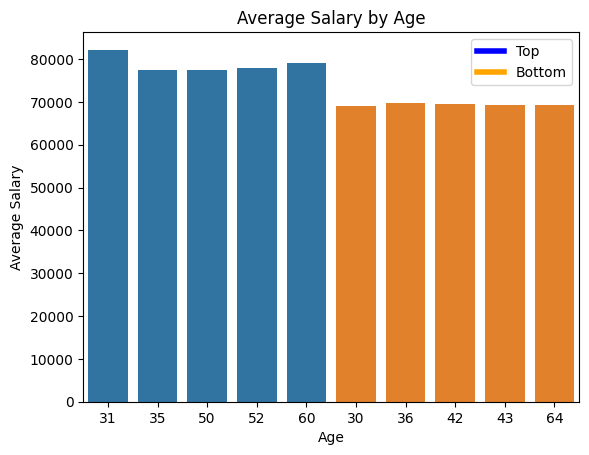

In [568]:
df_salary_by_age = df

average_salary_by_age = df.groupby('Age')['Salary'].mean().reset_index()
average_salary_by_age = average_salary_by_age.sort_values(by='Salary',ascending=False)
top_5_average_salary_by_age= average_salary_by_age.head(5)
bottom_5_average_salary_by_age = average_salary_by_age.tail(5)


# Displaying head and tail data side by side
plt.title('Average Salary by Age')
plt.xlabel('Age')
plt.ylabel('Average Salary')
sns.barplot(top_5_average_salary_by_age, x='Age', y = 'Salary')
sns.barplot(bottom_5_average_salary_by_age, x='Age', y = 'Salary')

# Displaying legend
orange_patch = plt.Line2D([0], [0], color='blue', linewidth=4, label='Top')
blue_patch = plt.Line2D([0], [0], color='orange', linewidth=4, label='Bottom')
plt.legend(handles=[orange_patch, blue_patch], loc='upper right')